In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
meta_df = pd.read_csv("./data_v4/meta.tab", delimiter="\t", encoding = "ISO-8859-1", low_memory=False)

In [3]:
df = pd.read_csv("./data_v4/cleanedGeneMatrix_transposed_log.csv", 
                 index_col="#gene")

### Check Null expression value

In [4]:
df.isnull().values.any()

False

### Take a log of expression values

In [ ]:
df_log = np.log(df+1)
df_log.to_csv("./data_v4/cleanedGeneMatrix_transposed_log.csv")

### Remove genes with low expression
low expression being defined by having >95% 0 expression in all samples

In [40]:
low_expressing_genes = []
for gene in df.columns:
    value_counts = df[gene].value_counts()
    zero_percentage = value_counts[0]/value_counts.sum()
    if zero_percentage > 0.95:
        low_expressing_genes.append(gene)

In [41]:
genes_to_keep = [i for i in df.columns if i not in low_expressing_genes]
cleaned_df = df[genes_to_keep]
cleaned_df.index.name = "sample"
cleaned_df.to_csv("./data_v4/ExpressionMatrix_cleaned.csv")

### Look at expression histogram

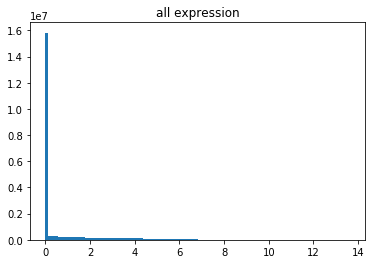

In [44]:
def plot_sample_histogram(df, random_state=0, title=""):
    sample = df.sample(1000, random_state=random_state)
    plt.hist(sample.values.flatten(), bins=100)
    plt.title(title)
    plt.show()
    
plot_sample_histogram(cleaned_df, title="all expression")

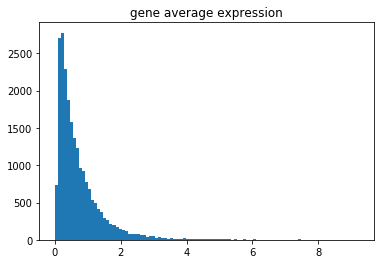

In [48]:
# gene average expression histogram
plt.hist(cleaned_df.mean(axis=0), bins=100)
plt.title("gene average expression")
plt.show()

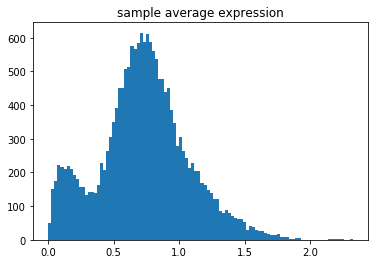

In [49]:
# sample average expression histogram
plt.hist(cleaned_df.mean(axis=1), bins=100)
plt.title("sample average expression")
plt.show()